In [39]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [10]:
dataset_directory = os.path.join(os.getcwd(),"dataset")

In [32]:
train_data = pd.read_csv(os.path.join(dataset_directory,"train.csv"))
test_data = pd.read_csv(os.path.join(dataset_directory,"test.csv"))
print("train shape: ",train_data.shape)
print("train shape: ",test_data.shape)

train shape:  (7613, 5)
train shape:  (3263, 4)


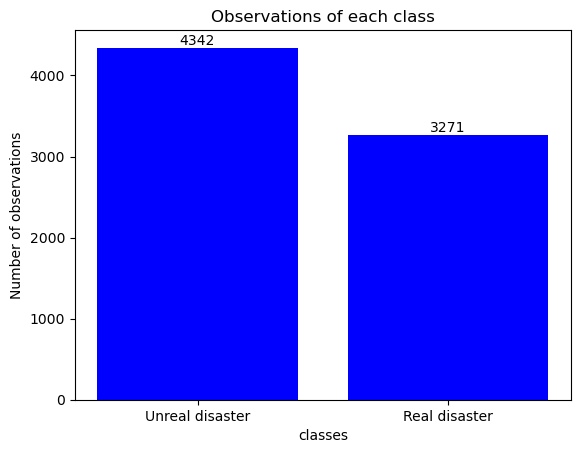

In [43]:
obs = train_data['target'].value_counts().to_dict()
bars = plt.bar(['Unreal disaster','Real disaster'],obs.values(),color='blue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    
plt.title("Observations of each class")
plt.xlabel("classes")
plt.ylabel("Number of observations")
plt.show()